In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Introduction: EDA of Cool Climate Data </h1>

This notebook serves as a workspace for exploratory data analysis of data attained from [Cool Climate Network (https://coolclimate.org/).

Source: CoolClimate Maps, U.C. Berkeley CoolClimate Network, 2013, http://coolclimate.berkeley.edu/maps.


The dataset contains 2014 estimates of annual estimated CO2 emissions from several different categories: 
- household energy (electricity, natural gas and other fuels), 
- transportation (motor vehicles, air travel, other), 
- food, 
- goods, 
- services 
- total emissions

The dataset also includes benchmark estimates of kWh electricity, therms of natural gas, gallons of fuel oil and vehicle miles traveled. 

<h1> EDA: Structure </h1>

The data is in the form of an excel sheet, and there are several different sheets in them. Here, we pull the sheet with zip codes and convert it into a Pandas dataframe. There are mostly quantitative variables, with the exception of State, and Zipcode (?). 


Structure - What was the format or file type of the imported data? Are there are any differences in data types between the individual IOU dataframes, the weather dataframe, and the combined dataframe?

In [7]:
#raw dataframe from the dataset
#dataset sourced from https://docs.google.com/forms/d/e/1FAIpQLSdzx772Bq7ZMZP-jmo17JISr0Myau9LDmz8kKdlK5Q-JJUr7A/viewform
#https://www.dropbox.com/s/xqfduksgt6cmema/Jones-Kammen-2014-Zip-City-County-Results.xlsx?dl=0

cc_zipcode = pd.read_excel('../../data/Jones-Kammen-2014-Zip-City-County-Results.xlsx', sheet_name='zip code results')
cc_zipcode.head()
cc_zipcode.shape

(31531, 31)

<h1> EDA: Granularity/Temporality/Scope </h1>

In terms of the granularity, each row of data represents a zipcode with their **estimated** carbon emissions, with all the data time resolution is over a year's worth of time in 2014. 

Because the scope of our research project focuses on California, we want all of the estimates of California Zipcodes. Therefore, we create a new dataframe containing only ZipCodes in California.

These estimates are based on Jones and Kammen (2014) http://pubs.acs.org/doi/abs/10.1021/es4034364.



In [8]:
#all California zipcodes
ca_zipcode = cc_zipcode[cc_zipcode['State'] == 'CA']
ca_zipcode.shape

(1659, 31)

In [9]:
# ca_zipcode.to_csv('jones-kammen-ca-data.csv')

In [10]:
ca_zipcode.head()

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
28629,90001,54481,4.35,138900,24207,33.974243,-118.245169,267,CA,California,...,0.000000,15862,10.218853,6.622800,13.05,4.679496,4.317047,38.888196,13302,517290.783459
28630,90002,44584,4.16,127700,22872,33.949380,-118.245060,267,CA,California,...,0.475335,15536,10.018989,7.143323,12.48,4.518860,4.190605,38.351776,11838,454008.330077
28631,90003,58187,4.00,134400,22346,33.963792,-118.274249,267,CA,California,...,0.000000,14614,9.456839,6.890064,12.00,4.449399,4.139889,36.936191,16071,593601.525079
28632,90004,67850,2.91,371100,27591,34.076680,-118.308976,267,CA,California,...,0.578773,13373,9.204518,5.391668,8.73,4.381741,4.535160,32.243087,23922,771319.128605
28633,90005,43014,2.80,392200,21998,34.058999,-118.312752,267,CA,California,...,0.434371,11004,7.551197,4.900292,8.40,3.980317,4.044875,28.876681,15905,459283.617501


<h1> EDA: Faithfulness </h1>

Looking at the faithfulness of our data, we see that it comes from a published research paper, and since then, this dataset has been used by 60 different universities, several government organizations, and many more organizations across the US. The data seems to be clean, but our EDA reveals a couple of NaN values that have to deal with Core Based Statistical Area (CBSA) and Metropolitan Statistical Area (MSA). We believe that this might be the case because some cities have smaller populations are may not be considered a MSA/CBSA. 

Faithfulness - Where do the data come from? Is there any reason to question it? Where do you find null values? How have the manipulations we have conducted in this notebook revealed (and impacted) faithfulness?



In [11]:
sum(ca_zipcode.isna().values)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123,
       123, 283, 725,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])

In [12]:
is_NaN = ca_zipcode.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ca_zipcode[row_has_NaN]
rows_with_NaN.iloc[:, range(12,16)].shape
print('There are', rows_with_NaN.iloc[:, range(12,16)].shape[0], 'entries with NaN values.')



There are 725 entries with NaN values.


<h1> Visualizations </h1>

Are we seeing any immediate relationships in the data? Below we plot: 
- The relationship between estimated carbon emission and household size (more people, more emissions?)
- The relationship between estimated carbon emission and income per household (more money, more emissions?)
- The relationship between estimated carbon emission and Vehicle miles traveled (more travelling, more emissions?)

Text(0.5, 1.0, 'Estimated carbon emission vs household size')

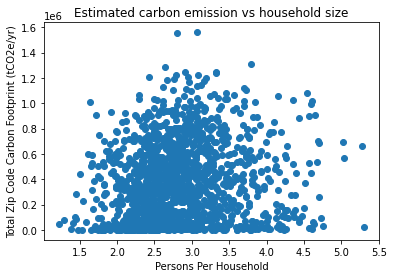

In [44]:
X = ca_zipcode['PersonsPerHousehold']
y = ca_zipcode['Total Zip Code Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('Persons Per Household')
plt.ylabel('Total Zip Code Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs household size')

#things to consider: The y-scale starts at 0?

Text(0.5, 1.0, 'Estimated carbon emission vs income per household')

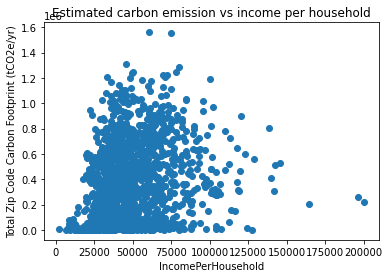

In [13]:
X = ca_zipcode['IncomePerHousehold']
y = ca_zipcode['Total Zip Code Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('IncomePerHousehold')
plt.ylabel('Total Zip Code Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs income per household')

Text(0.5, 1.0, 'Estimated carbon emission vs Vehicle miles traveled')

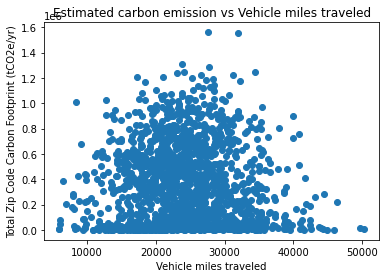

In [16]:
X = ca_zipcode['Vehicle miles traveled']
y = ca_zipcode['Total Zip Code Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('Vehicle miles traveled')
plt.ylabel('Total Zip Code Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs Vehicle miles traveled')

In [20]:
ca_zipcode.columns

Index(['ZipCode', 'Population', 'PersonsPerHousehold', 'AverageHouseValue',
       'IncomePerHousehold', 'Latitude', 'Longitude', 'Elevation', 'State',
       'StateFullName', 'City', 'CountyName', 'CBSAType', 'CBSAName',
       'MSAName', 'PMSA_Name', 'Region', 'Division', 'popden',
       'electricity (kWh)', 'Nat. Gas (cu.ft.)', 'FUELOIL (gallons)',
       'Vehicle miles traveled', 'Transport (tCO2e/yr)', 'Housing (tCO2e/yr)',
       'Food (tCO2e/yr)', 'Goods (tCO2e/yr)', 'Services (tCO2e/yr)',
       'Total Household Carbon Footprint (tCO2e/yr)', 'HouseholdsPerZipCode',
       'Total Zip Code Carbon Footprint (tCO2e/yr)'],
      dtype='object')

In [19]:
ca_zipcode.head()

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
28629,90001,54481,4.35,138900,24207,33.974243,-118.245169,267,CA,California,...,0.000000,15862,10.218853,6.622800,13.05,4.679496,4.317047,38.888196,13302,517290.783459
28630,90002,44584,4.16,127700,22872,33.949380,-118.245060,267,CA,California,...,0.475335,15536,10.018989,7.143323,12.48,4.518860,4.190605,38.351776,11838,454008.330077
28631,90003,58187,4.00,134400,22346,33.963792,-118.274249,267,CA,California,...,0.000000,14614,9.456839,6.890064,12.00,4.449399,4.139889,36.936191,16071,593601.525079
28632,90004,67850,2.91,371100,27591,34.076680,-118.308976,267,CA,California,...,0.578773,13373,9.204518,5.391668,8.73,4.381741,4.535160,32.243087,23922,771319.128605
28633,90005,43014,2.80,392200,21998,34.058999,-118.312752,267,CA,California,...,0.434371,11004,7.551197,4.900292,8.40,3.980317,4.044875,28.876681,15905,459283.617501


Text(0.5, 1.0, 'Latitude vs. Household Carbon Footprint')

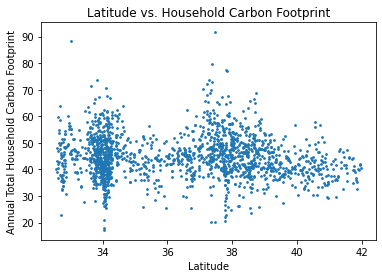

In [17]:
# latitude vs. total household carbon footprint
plt.scatter(ca_zipcode['Latitude'], ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)'], s=3)
plt.xlabel('Latitude')
plt.ylabel('Annual Total Household Carbon Footprint')
plt.title('Latitude vs. Household Carbon Footprint')

Text(0.5, 1.0, 'Household Income vs. Household Carbon Footprint')

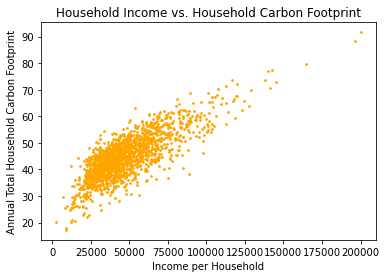

In [18]:
# income per household vs. total household carbon footprint
plt.scatter(ca_zipcode['IncomePerHousehold'], ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)'], s=3, c='orange')
plt.xlabel('Income per Household')
plt.ylabel('Annual Total Household Carbon Footprint')
plt.title('Household Income vs. Household Carbon Footprint')